In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import cv2

from matplotlib import pyplot as plt

Using TensorFlow backend.


## 0. load MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11264000/11490434 [============================>.] - ETA: 0s

In [3]:
cleanChar = np.zeros((10,28,28))

In [13]:
for i in range(10):
    cleanChar[i]=cv2.imread('./data/digits/%d.png' % i,0)

In [17]:
x_train_clean = cleanChar[y_train]
x_test_clean = cleanChar[y_test]

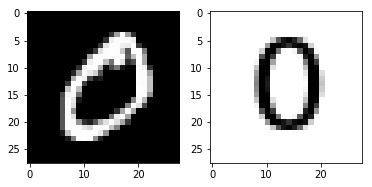

In [15]:
plt.figure()
plt.subplot(121)
plt.imshow(x_train[1],cmap='gray')
plt.subplot(122)
plt.imshow(x_train_clean[1],cmap='gray')

In [18]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train_clean = x_train_clean.astype('float32')/255.
x_test_clean = x_test_clean.astype('float32')/255.

x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))
x_train_clean = x_train_clean.reshape((len(x_train_clean),-1))
x_test_clean = x_test_clean.reshape((len(x_test_clean),-1))


## 1. Simple auto-encoder using a single dense layer

In [57]:
img_dim = 28*28

encoding_dim = 32
input_img = Input(shape=(img_dim,))
l1 = Dense(64, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(l1)
decoded = Dense(img_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img,decoded)

In [58]:
encoder = Model(input_img, encoded)

In [59]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
Total params: 52,320
Trainable params: 52,320
Non-trainable params: 0
_________________________________________________________________


In [60]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
Total params: 52,320
Trainable params: 52,320
Non-trainable params: 0
_________________________________________________________________


In [69]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0652 - acc: 0.8946 - val_loss: 0.0651 - val_acc: 0.8947
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.0648 - acc: 0.8947 - val_loss: 0.0648 - val_acc: 0.8948
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0644 - acc: 0.8947 - val_loss: 0.0643 - val_acc: 0.8948
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0641 - acc: 0.8948 - val_loss: 0.0640 - val_acc: 0.8949
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0637 - acc: 0.8949 - val_loss: 0.0637 - val_acc: 0.8950
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0634 - acc: 0.8949 - val_loss: 0.0634 - val_acc: 0.8950
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0631 - acc: 0.8950 - val_loss: 0.0631 - val_acc: 0.8951
Epoch 8/50
60000/60000 [==============================] - 4s 

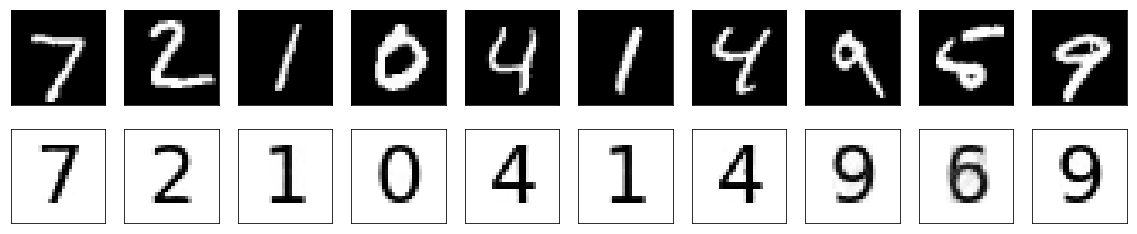

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0555 - acc: 0.8964 - val_loss: 0.0561 - val_acc: 0.8963
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.0554 - acc: 0.8964 - val_loss: 0.0560 - val_acc: 0.8963
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0553 - acc: 0.8964 - val_loss: 0.0560 - val_acc: 0.8963
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0552 - acc: 0.8965 - val_loss: 0.0559 - val_acc: 0.8963
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0551 - acc: 0.8965 - val_loss: 0.0559 - val_acc: 0.8963
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0550 - acc: 0.8965 - val_loss: 0.0557 - val_acc: 0.8963
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0550 - acc: 0.8965 - val_loss: 0.0556 - val_acc: 0.8964
Epoch 8/50
60000/60000 [==============================] - 4s 

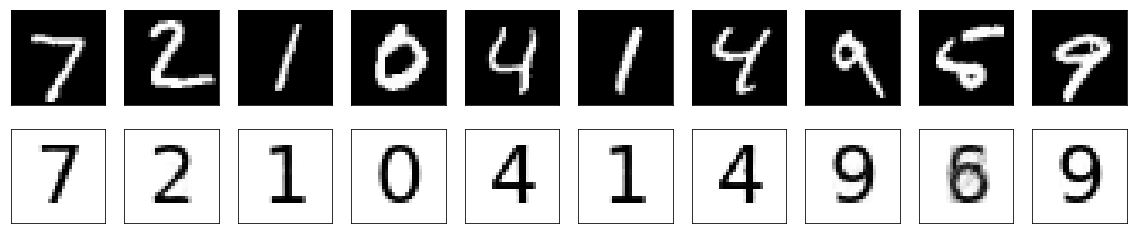

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0522 - acc: 0.8970 - val_loss: 0.0535 - val_acc: 0.8966
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.0522 - acc: 0.8970 - val_loss: 0.0535 - val_acc: 0.8967
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0521 - acc: 0.8970 - val_loss: 0.0535 - val_acc: 0.8967
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0521 - acc: 0.8970 - val_loss: 0.0535 - val_acc: 0.8966
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0521 - acc: 0.8970 - val_loss: 0.0534 - val_acc: 0.8967
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0520 - acc: 0.8970 - val_loss: 0.0534 - val_acc: 0.8967
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0520 - acc: 0.8970 - val_loss: 0.0534 - val_acc: 0.8967
Epoch 8/50
60000/60000 [==============================] - 4s 

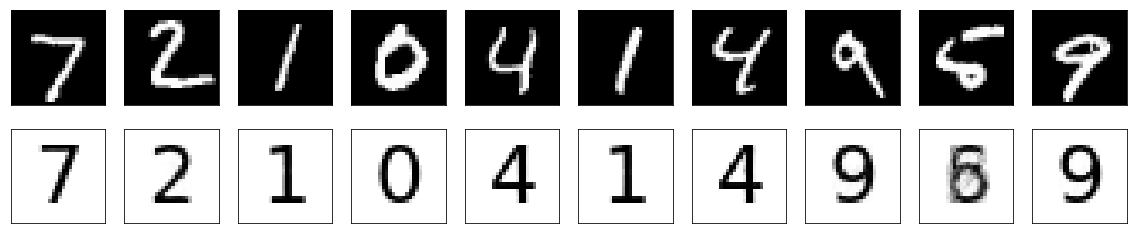

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0506 - acc: 0.8973 - val_loss: 0.0527 - val_acc: 0.8968
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.0505 - acc: 0.8973 - val_loss: 0.0527 - val_acc: 0.8968
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0505 - acc: 0.8973 - val_loss: 0.0526 - val_acc: 0.8968
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0505 - acc: 0.8973 - val_loss: 0.0526 - val_acc: 0.8968
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0505 - acc: 0.8973 - val_loss: 0.0527 - val_acc: 0.8968
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0504 - acc: 0.8973 - val_loss: 0.0526 - val_acc: 0.8968
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0504 - acc: 0.8973 - val_loss: 0.0526 - val_acc: 0.8968
Epoch 8/50
60000/60000 [==============================] - 4s 

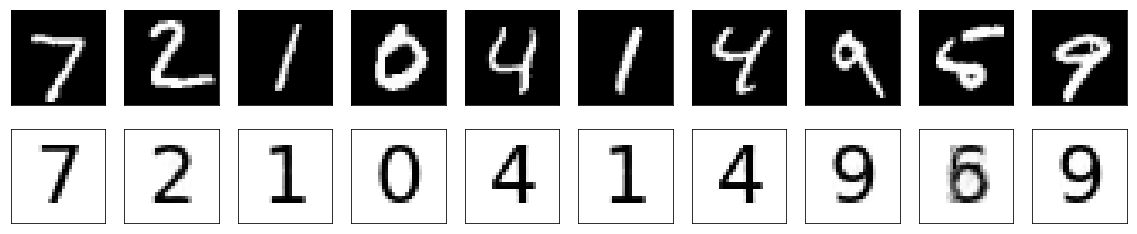

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0495 - acc: 0.8975 - val_loss: 0.0523 - val_acc: 0.8969
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.0495 - acc: 0.8975 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0495 - acc: 0.8975 - val_loss: 0.0523 - val_acc: 0.8968
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0495 - acc: 0.8975 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0494 - acc: 0.8975 - val_loss: 0.0523 - val_acc: 0.8969
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0494 - acc: 0.8975 - val_loss: 0.0524 - val_acc: 0.8969
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0494 - acc: 0.8975 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 8/50
60000/60000 [==============================] - 4s 

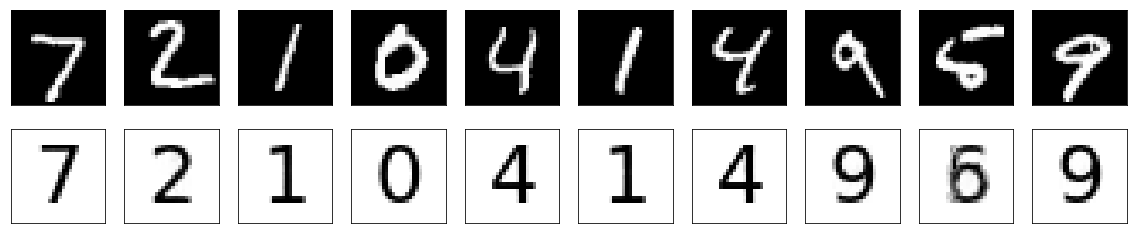

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0488 - acc: 0.8976 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.0488 - acc: 0.8976 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0488 - acc: 0.8976 - val_loss: 0.0521 - val_acc: 0.8969
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0487 - acc: 0.8976 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0487 - acc: 0.8976 - val_loss: 0.0521 - val_acc: 0.8969
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0487 - acc: 0.8976 - val_loss: 0.0521 - val_acc: 0.8969
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0487 - acc: 0.8976 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 8/50
60000/60000 [==============================] - 4s 

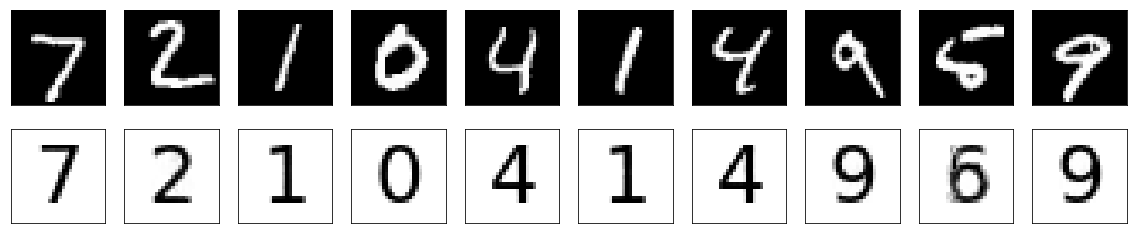

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0482 - acc: 0.8977 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.0482 - acc: 0.8977 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0482 - acc: 0.8977 - val_loss: 0.0522 - val_acc: 0.8968
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0482 - acc: 0.8977 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0481 - acc: 0.8977 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0481 - acc: 0.8977 - val_loss: 0.0523 - val_acc: 0.8969
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0481 - acc: 0.8977 - val_loss: 0.0522 - val_acc: 0.8969
Epoch 8/50
60000/60000 [==============================] - 4s 

KeyboardInterrupt: 

In [73]:
for _ in range(10):
    autoencoder.fit(x_train,x_train_clean,
                epochs = 50, 
                batch_size = 512,
                shuffle=True,
                validation_data=(x_test, x_test_clean))

    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [96]:
from keras.models import load_model

In [98]:
autoencoder.save('autoencoder_mnist.h5')
encoder.save('encoder_mnist.h5')
decoder.save('decoder_mnist.h5')

In [74]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [89]:
decoded_imgs = autoencoder.predict(x_test)

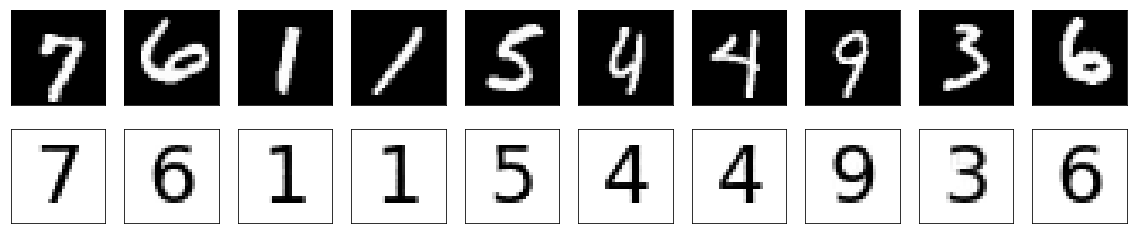

In [83]:
n = 10  # how many digits we will display

ind = np.random.choice(x_test.shape[0],size=(n,))
plt.figure(figsize=(20, 4))
for i,j in enumerate(ind):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[j].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[j].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()